# Testing the model

Using your solution so far, test the model on new data.

The new data is located in the ‘Bank_data_testing.csv’.

Good luck!

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq,df)

## Load the data

Load the ‘Bank_data.csv’ dataset.

In [2]:
raw_data = pd.read_csv(r"C:\Users\maria\OneDrive\Documents\Camille\BAITO\PARA SA KINABUKASAN\The Data Science Course 2021 - All Resources\Part_5_Advanced_Statistical_Methods_(Machine_Learning)\S36_L249\Bank-data.csv")
raw_data

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.334,0.0,1.0,0.0,0.0,117.0,no
1,1,0.767,0.0,0.0,2.0,1.0,274.0,yes
2,2,4.858,0.0,1.0,0.0,0.0,167.0,no
3,3,4.120,0.0,0.0,0.0,0.0,686.0,yes
4,4,4.856,0.0,1.0,0.0,0.0,157.0,no
...,...,...,...,...,...,...,...,...
513,513,1.334,0.0,1.0,0.0,0.0,204.0,no
514,514,0.861,0.0,0.0,2.0,1.0,806.0,yes
515,515,0.879,0.0,0.0,0.0,0.0,290.0,no
516,516,0.877,0.0,0.0,5.0,1.0,473.0,yes


In [3]:
data = raw_data.drop(["Unnamed: 0"], axis=1)
data

,interest_rate,credit,march,may,previous,duration,y
0,1.334,0.0,1.0,0.0,0.0,117.0,no
1,0.767,0.0,0.0,2.0,1.0,274.0,yes
2,4.858,0.0,1.0,0.0,0.0,167.0,no
3,4.120,0.0,0.0,0.0,0.0,686.0,yes
4,4.856,0.0,1.0,0.0,0.0,157.0,no
...,...,...,...,...,...,...,...
513,1.334,0.0,1.0,0.0,0.0,204.0,no
514,0.861,0.0,0.0,2.0,1.0,806.0,yes
515,0.879,0.0,0.0,0.0,0.0,290.0,no
516,0.877,0.0,0.0,5.0,1.0,473.0,yes


In [4]:
data["y"] = data["y"].map({"yes":1, "no":0})
data

,interest_rate,credit,march,may,previous,duration,y
0,1.334,0.0,1.0,0.0,0.0,117.0,0
1,0.767,0.0,0.0,2.0,1.0,274.0,1
2,4.858,0.0,1.0,0.0,0.0,167.0,0
3,4.120,0.0,0.0,0.0,0.0,686.0,1
4,4.856,0.0,1.0,0.0,0.0,157.0,0
...,...,...,...,...,...,...,...
513,1.334,0.0,1.0,0.0,0.0,204.0,0
514,0.861,0.0,0.0,2.0,1.0,806.0,1
515,0.879,0.0,0.0,0.0,0.0,290.0,0
516,0.877,0.0,0.0,5.0,1.0,473.0,1


### Declare the dependent and independent variables

Use 'duration' as the independet variable.

In [5]:
y = data["y"]
x1 = data["duration"]

### Simple Logistic Regression

Run the regression and graph the scatter plot.

In [6]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

results_log.summary()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Tue, 23 May 2023   Pseudo R-squ.:                  0.2121
Time:                        22:50:14   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

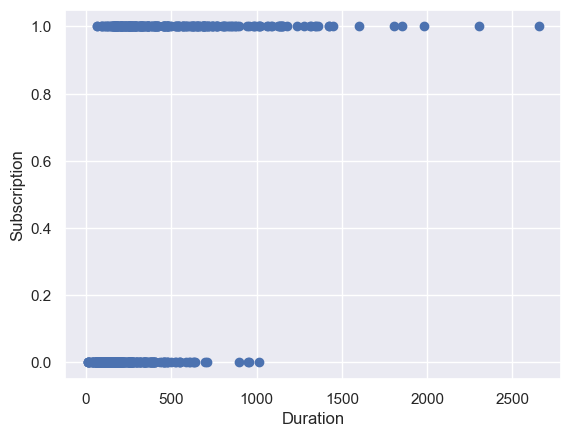

In [7]:
plt.scatter(x1,y)
plt.xlabel("Duration")
plt.ylabel("Subscription")

plt.show()

## Expand the model

We can be omitting many causal factors in our simple logistic model, so we instead switch to a multivariate logistic regression model. Add the ‘interest_rate’, ‘march’, ‘credit’ and ‘previous’ estimators to our model and run the regression again. 

### Declare the independent variable(s)

In [8]:
estimators = ["interest_rate", "march", "credit", "previous", "duration"]
x1_all = data[estimators]
y = data["y"]

In [9]:
x_all = sm.add_constant(x1_all)
reg_log = sm.Logit(y,x_all)
results_logit = reg_log.fit()

results_logit.summary()

Optimization terminated successfully.
         Current function value: 0.336664
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      512
Method:                           MLE   Df Model:                            5
Date:                Tue, 23 May 2023   Pseudo R-squ.:                  0.5143
Time:                        22:50:15   Log-Likelihood:                -174.39
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 1.211e-77
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0211      0.311     -0.068      0.946      -0.631       0.589
interest_rate    -0.8001      0.089     -8.943      0.000      -0.975      -0.625
march            -1.8322      0.330     -5.556      0.000      -2.478      -1.186
credit            2.3585      1.088      2.169      0.030       0.227       4.490
previous          1.5363      0.501      3.067      0.002       0.554       2.518
duration          0.0070      0.001      9.381      0.000       0.006       0.008
=================================================================================
"""

### Confusion Matrix

Find the confusion matrix of the model and estimate its accuracy. 

<i> For convenience we have already provided you with a function that finds the confusion matrix and the model accuracy.</i>

In [10]:
def confusion_matrix(data,actual_values,model):
        
        # Confusion matrix 
        
        # Parameters
        # ----------
        # data: data frame or array
            # data is a data frame formatted in the same way as your input data (without the actual values)
            # e.g. const, var1, var2, etc. Order is very important!
        # actual_values: data frame or array
            # These are the actual values from the test_data
            # In the case of a logistic regression, it should be a single column with 0s and 1s
            
        # model: a LogitResults object
            # this is the variable where you have the fitted model 
            # e.g. results_log in this course
        # ----------
        
        #Predict the values using the Logit model
        pred_values = model.predict(data)
        # Specify the bins 
        bins=np.array([0,0.5,1])
        # Create a histogram, where if values are between 0 and 0.5 tell will be considered 0
        # if they are between 0.5 and 1, they will be considered 1
        cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
        # Calculate the accuracy
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        # Return the confusion matrix and 
        return cm, accuracy

In [11]:
confusion_matrix(x_all,y,results_logit)

(array([[218.,  41.],
        [ 30., 229.]]),
 0.862934362934363)

## Test the model

Load the test data from the ‘Bank_data_testing.csv’ file provided. (Remember to convert the outcome variable ‘y’ into Boolean). 

### Load new data 

In [12]:
raw_data_testing = pd.read_csv(r"C:\Users\maria\OneDrive\Documents\Camille\BAITO\PARA SA KINABUKASAN\The Data Science Course 2021 - All Resources\Part_5_Advanced_Statistical_Methods_(Machine_Learning)\S36_L249\Bank-data-testing.csv")
raw_data_testing

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.313,0.0,1.0,0.0,0.0,487.0,no
1,1,4.961,0.0,0.0,0.0,0.0,132.0,no
2,2,4.856,0.0,1.0,0.0,0.0,92.0,no
3,3,4.120,0.0,0.0,0.0,0.0,1468.0,yes
4,4,4.963,0.0,0.0,0.0,0.0,36.0,no
...,...,...,...,...,...,...,...,...
217,217,4.963,0.0,0.0,0.0,0.0,458.0,yes
218,218,1.264,0.0,1.0,1.0,0.0,397.0,yes
219,219,1.281,0.0,1.0,0.0,0.0,34.0,no
220,220,0.739,0.0,0.0,2.0,0.0,233.0,no


In [13]:
data_testing = raw_data_testing.drop(["Unnamed: 0"], axis=1)
data_testing

,interest_rate,credit,march,may,previous,duration,y
0,1.313,0.0,1.0,0.0,0.0,487.0,no
1,4.961,0.0,0.0,0.0,0.0,132.0,no
2,4.856,0.0,1.0,0.0,0.0,92.0,no
3,4.120,0.0,0.0,0.0,0.0,1468.0,yes
4,4.963,0.0,0.0,0.0,0.0,36.0,no
...,...,...,...,...,...,...,...
217,4.963,0.0,0.0,0.0,0.0,458.0,yes
218,1.264,0.0,1.0,1.0,0.0,397.0,yes
219,1.281,0.0,1.0,0.0,0.0,34.0,no
220,0.739,0.0,0.0,2.0,0.0,233.0,no


In [14]:
data_testing["y"] = data_testing["y"].map({"yes":1, "no":0})
data_testing

,interest_rate,credit,march,may,previous,duration,y
0,1.313,0.0,1.0,0.0,0.0,487.0,0
1,4.961,0.0,0.0,0.0,0.0,132.0,0
2,4.856,0.0,1.0,0.0,0.0,92.0,0
3,4.120,0.0,0.0,0.0,0.0,1468.0,1
4,4.963,0.0,0.0,0.0,0.0,36.0,0
...,...,...,...,...,...,...,...
217,4.963,0.0,0.0,0.0,0.0,458.0,1
218,1.264,0.0,1.0,1.0,0.0,397.0,1
219,1.281,0.0,1.0,0.0,0.0,34.0,0
220,0.739,0.0,0.0,2.0,0.0,233.0,0


### Declare the dependent and the independent variables

In [15]:
y_test = data_testing["y"]
x1_test_all = data_testing[estimators]

In [16]:
x_test_all = sm.add_constant(x1_test_all)

Determine the test confusion matrix and the test accuracy and compare them with the train confusion matrix and the train accuracy.

In [17]:
confusion_matrix(x_test_all,y_test,results_logit)

(array([[93., 18.],
        [13., 98.]]),
 0.8603603603603603)

In [18]:
confusion_matrix(x_all,y,results_logit)

(array([[218.,  41.],
        [ 30., 229.]]),
 0.862934362934363)

In [19]:
np.set_printoptions(formatter={"float": lambda x: "{0:0.2f}".format(x)})
results_logit.predict() #prediction of the training data

#these are probabilities, <0.5, will be 0, >0.5 will be 1

array([0.11, 0.94, 0.01, 0.81, 0.01, 0.53, 0.03, 0.00, 0.71, 0.07, 0.95,
       0.50, 0.89, 0.10, 0.08, 0.82, 0.87, 0.85, 0.37, 0.76, 0.97, 0.87,
       0.13, 0.10, 0.65, 0.09, 0.77, 0.76, 0.90, 0.04, 0.02, 0.12, 0.27,
       0.71, 0.06, 0.01, 0.99, 0.06, 1.00, 0.54, 0.06, 0.84, 0.06, 0.01,
       0.87, 0.55, 0.00, 0.15, 0.16, 0.83, 0.72, 0.05, 0.03, 0.05, 0.01,
       0.81, 0.09, 0.80, 0.98, 0.84, 0.04, 0.11, 0.99, 0.76, 0.16, 0.31,
       0.05, 0.06, 1.00, 0.07, 0.02, 0.72, 0.14, 0.97, 0.87, 0.13, 0.67,
       0.05, 0.01, 0.03, 0.92, 0.79, 0.89, 0.13, 0.19, 0.98, 0.64, 0.86,
       0.74, 0.03, 0.08, 0.03, 0.71, 0.64, 0.95, 0.97, 0.97, 0.03, 0.98,
       0.06, 0.99, 0.07, 0.99, 0.69, 0.28, 0.36, 0.20, 0.70, 0.73, 0.03,
       0.99, 0.41, 0.16, 0.05, 0.94, 0.02, 0.04, 0.90, 0.50, 0.14, 0.10,
       0.00, 0.92, 1.00, 0.33, 0.98, 0.93, 0.84, 0.70, 0.67, 0.05, 0.26,
       0.81, 0.79, 0.81, 0.08, 0.22, 0.74, 0.11, 0.01, 0.01, 0.01, 0.23,
       0.79, 0.23, 1.00, 0.23, 0.01, 1.00, 0.54, 0.

In [20]:
np.array(data["y"]) #actual values

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [21]:
pd.set_option('display.max_rows', 999)
table = pd.DataFrame(data = results_logit.predict(), columns = ["Predicte Values"])
table["Actual Values"] = np.array(data["y"])
table

,Predicte Values,Actual Values
0,0.108457,0
1,0.943101,1
2,0.010167,0
3,0.810800,1
4,0.009505,0
5,0.534011,0
6,0.032081,0
7,0.003604,0
8,0.712333,1
9,0.067448,0
